<a href="https://colab.research.google.com/github/ulya1202/Computer_vision_projects/blob/main/Hand_digit_recognitin_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.5/974.5 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 65.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
import os
import glob
import yaml


# Functions

In [ ]:
def create_data_yaml(path_to_classes_txt, path_to_data_yaml):


  if not os.path.exists(path_to_classes_txt):
    print(f'classes.txt file not found! Please create a classes.txt labelmap and move it to {path_to_classes_txt}')
    return
  with open(path_to_classes_txt, 'r') as f:
    classes = []
    for line in f.readlines():
      if len(line.strip()) == 0: continue
      classes.append(line.strip())
  number_of_classes = len(classes)


  data = {
      'path': '/content',
      'train': 'val/images',
      'val': 'train/images',
      'nc': number_of_classes,
      'names': classes
  }


  with open(path_to_data_yaml, 'w') as f:
    yaml.dump(data, f, sort_keys=False)
  print(f'Created config file at {path_to_data_yaml}')

  return

In [ ]:
def delet_unmatched(xs,ys):
    x_lis=os.listdir(xs)
    y_lis=os.listdir(ys)
    xs_1=list(map(lambda x: x.split('.')[0], x_lis))
    ys_1=list(map(lambda x: x.split('.')[0], y_lis))

    list_of_first_pattern=list(filter(lambda x: x not in ys_1, xs_1))

    for delet_label in list_of_first_pattern:
        for label in x_lis:
            if label.startswith(delet_label):
                delet_path=os.path.join(xs,label)
                os.remove(delet_path)
    x_lis=os.listdir(xs)
    y_lis=os.listdir(ys)
    return list_of_first_pattern



# Import data

##data 1

In [ ]:
#!/bin/bash
!curl -L -o hand-gestures-new.zip  https://www.kaggle.com/api/v1/datasets/download/ahmadgabari/hand-gestures-new

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  119M  100  119M    0     0  29.5M      0  0:00:04  0:00:04 --:--:-- 37.9M


In [ ]:
!unzip -q /content/hand-gestures-new.zip -d /content/val

### Delet unmatched and mk directories

In [ ]:
label_dir='/content/val/labels'
img_dir='/content/val/images'
img_list=os.listdir(img_dir)
label_lis=os.listdir(label_dir)


In [ ]:
len(os.listdir('/content/val/images')),len(os.listdir('/content/val/labels'))

(778, 779)

In [ ]:
delet_unmatched(label_dir,img_dir)

['344', '349', '507', '347']

In [ ]:
delet_unmatched(img_dir,label_dir)

['WIN_20220803_19_15_40_Pro',
 'WIN_20220803_19_13_37_Pro',
 'WIN_20220803_19_15_39_Pro']

## Yaml

In [ ]:
path_to_classes_txt = '/content/val/classes.txt'
path_to_data_yaml = '/content/data.yaml'

create_data_yaml(path_to_classes_txt, path_to_data_yaml)

Created config file at /content/data.yaml


In [ ]:
import os
import random
import shutil

def split_val_to_train_and_val(base_dir, val_ratio=0.2):
    val_imgs_dir = os.path.join(base_dir, 'val/images')
    val_lbls_dir = os.path.join(base_dir, 'val/labels')

    train_imgs_dir = os.path.join(base_dir, 'train/images')
    train_lbls_dir = os.path.join(base_dir, 'train/labels')

    # Qovluqları yarat
    os.makedirs(train_imgs_dir, exist_ok=True)
    os.makedirs(train_lbls_dir, exist_ok=True)

    # Bütün şəkilləri topla
    images = [f for f in os.listdir(val_imgs_dir) if f.endswith(('.jpg', '.png'))]
    random.shuffle(images)

    # Val fayllarını seçmək
    val_len = int(len(images) * val_ratio)
    val_images = images[:val_len]

    # Faylları köçür
    for img in val_images:
        label = img.replace('.jpg', '.txt').replace('.png', '.txt')

        # Köçürüləcək faylların mövcudluğunu yoxla
        if os.path.exists(os.path.join(val_lbls_dir, label)):
            shutil.move(os.path.join(val_imgs_dir, img), os.path.join(train_imgs_dir, img))
            shutil.move(os.path.join(val_lbls_dir, label), os.path.join(train_lbls_dir, label))

    print(f"{len(val_images)} şəkil və etiket train qovluğuna köçürüldü.")

# İstifadə:
split_val_to_train_and_val('/content', val_ratio=0.2)


114 şəkil və etiket train qovluğuna köçürüldü.


# train

In [ ]:
!yolo detect train data=/content/data.yaml model=yolo11s.pt epochs=60 imgsz=640

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 18.4M/18.4M [00:00<00:00, 83.9MB/s]
Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/data.yaml, epochs=60, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, io

In [ ]:
!yolo detect predict model=/content/runs/detect/train/weights/best.pt source=/content/val/images save=True

Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,415,509 parameters, 0 gradients, 21.3 GFLOPs

image 1/660 /content/val/images/100.JPG: 640x480 1 one, 53.8ms
image 2/660 /content/val/images/101.JPG: 640x384 1 one, 45.7ms
image 3/660 /content/val/images/102.JPG: 640x480 1 one, 13.0ms
image 4/660 /content/val/images/103.JPG: 640x480 1 one, 12.3ms
image 5/660 /content/val/images/104.JPG: 640x384 1 one, 11.5ms
image 6/660 /content/val/images/105.JPG: 640x480 1 one, 13.0ms
image 7/660 /content/val/images/106.JPG: 640x480 1 one, 12.3ms
image 8/660 /content/val/images/107.JPG: 640x480 1 one, 12.3ms
image 9/660 /content/val/images/108.JPG: 640x480 1 one, 12.3ms
image 10/660 /content/val/images/109.JPG: 640x480 1 one, 12.3ms
image 11/660 /content/val/images/110.JPG: 640x480 1 one, 12.3ms
image 12/660 /content/val/images/111.JPG: 640x384 1 one, 11.2ms
image 13/660 /content/val/images/112.JPG: 640x480 1 one, 11.0ms
image 14/

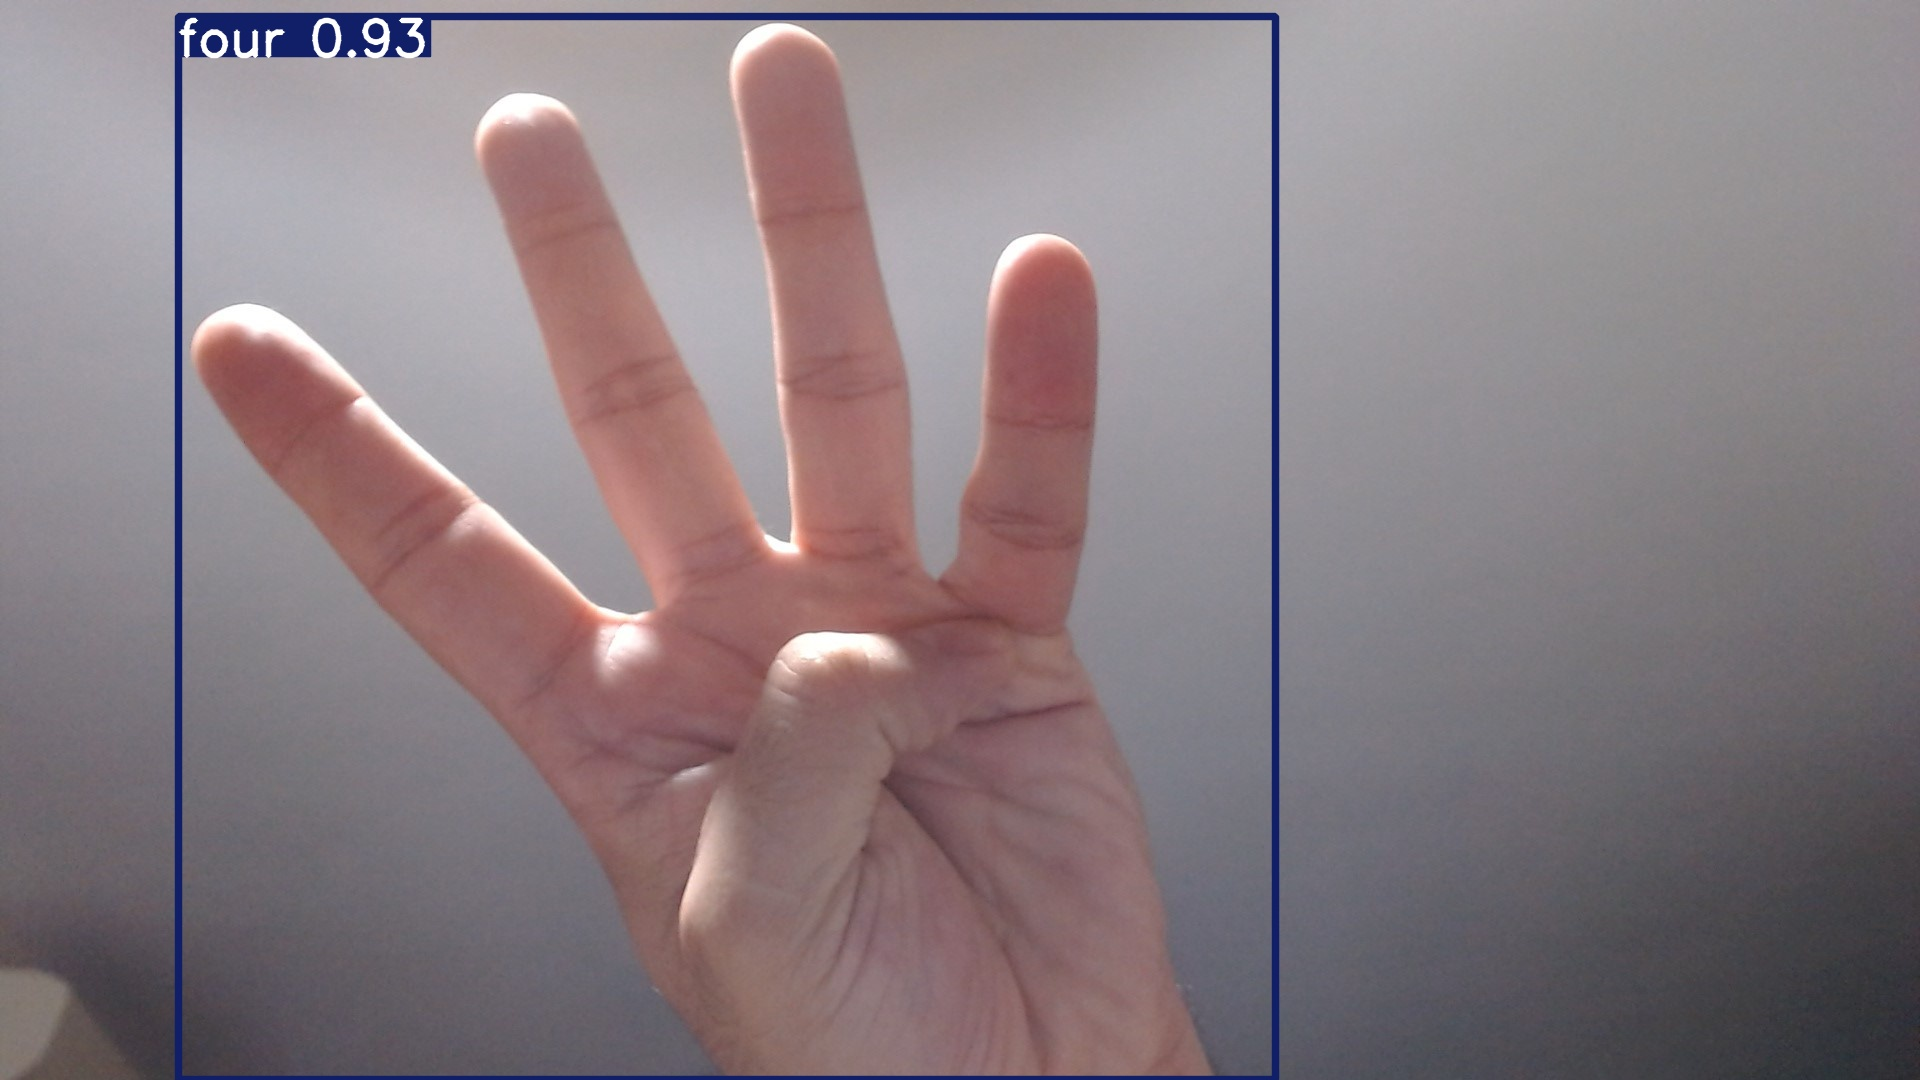

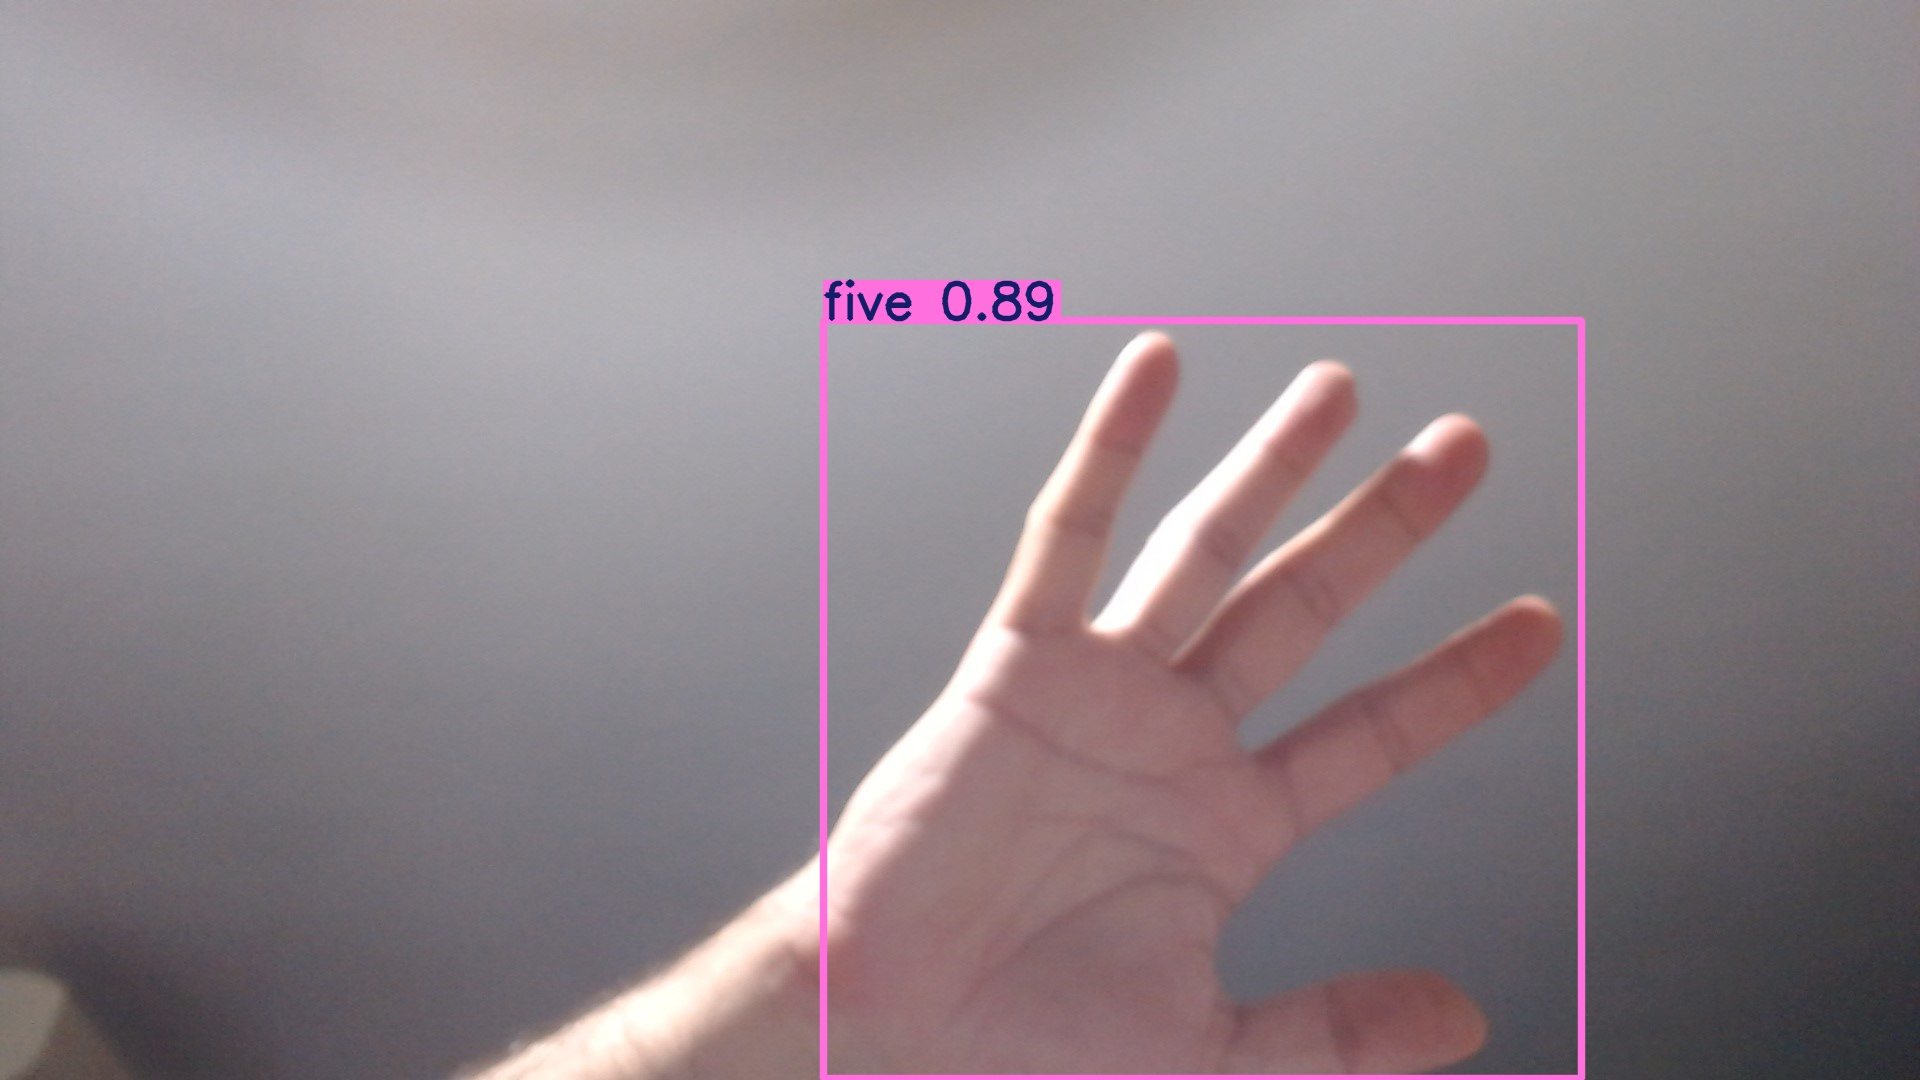

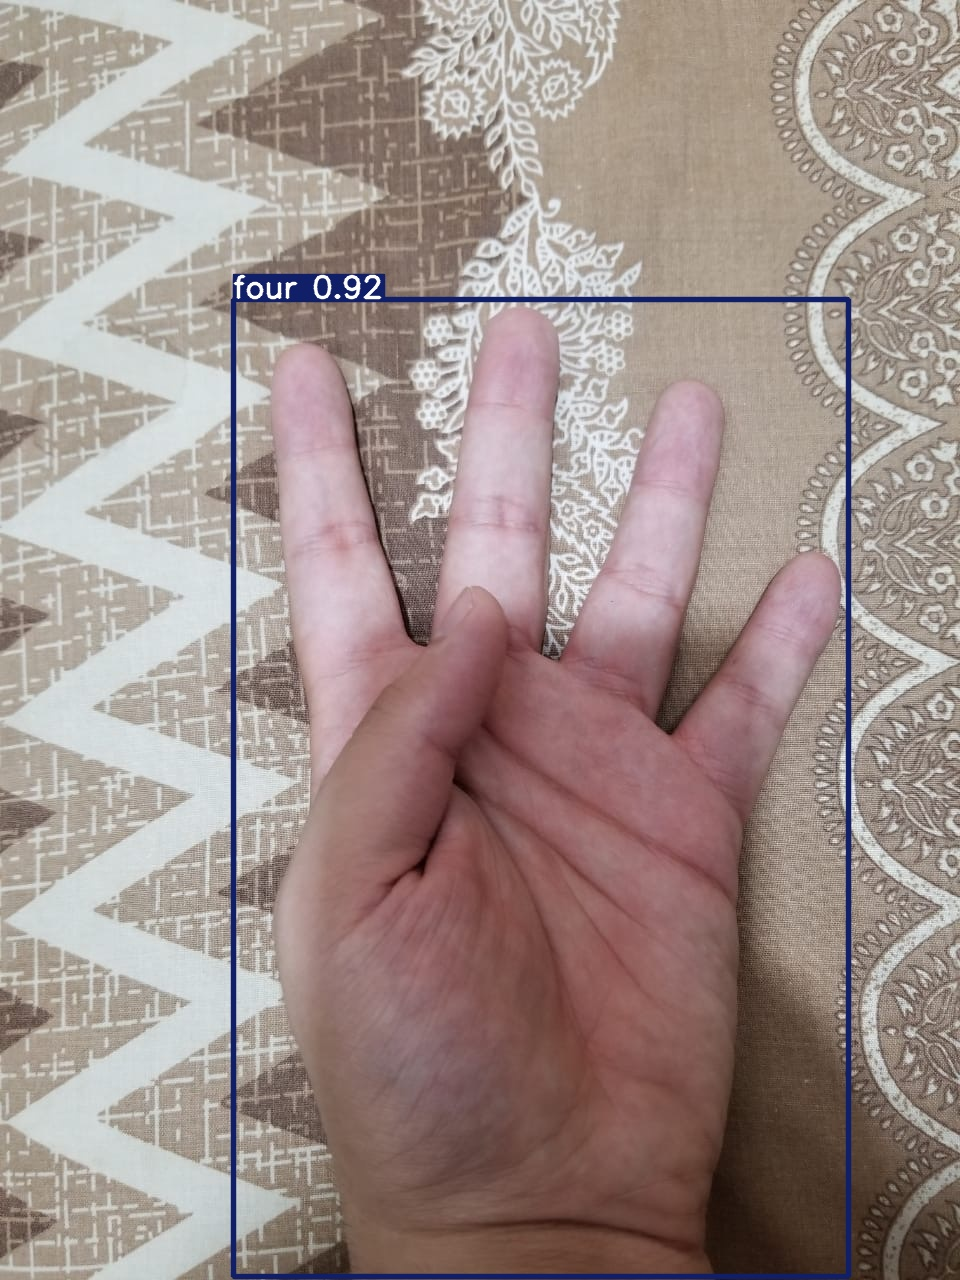

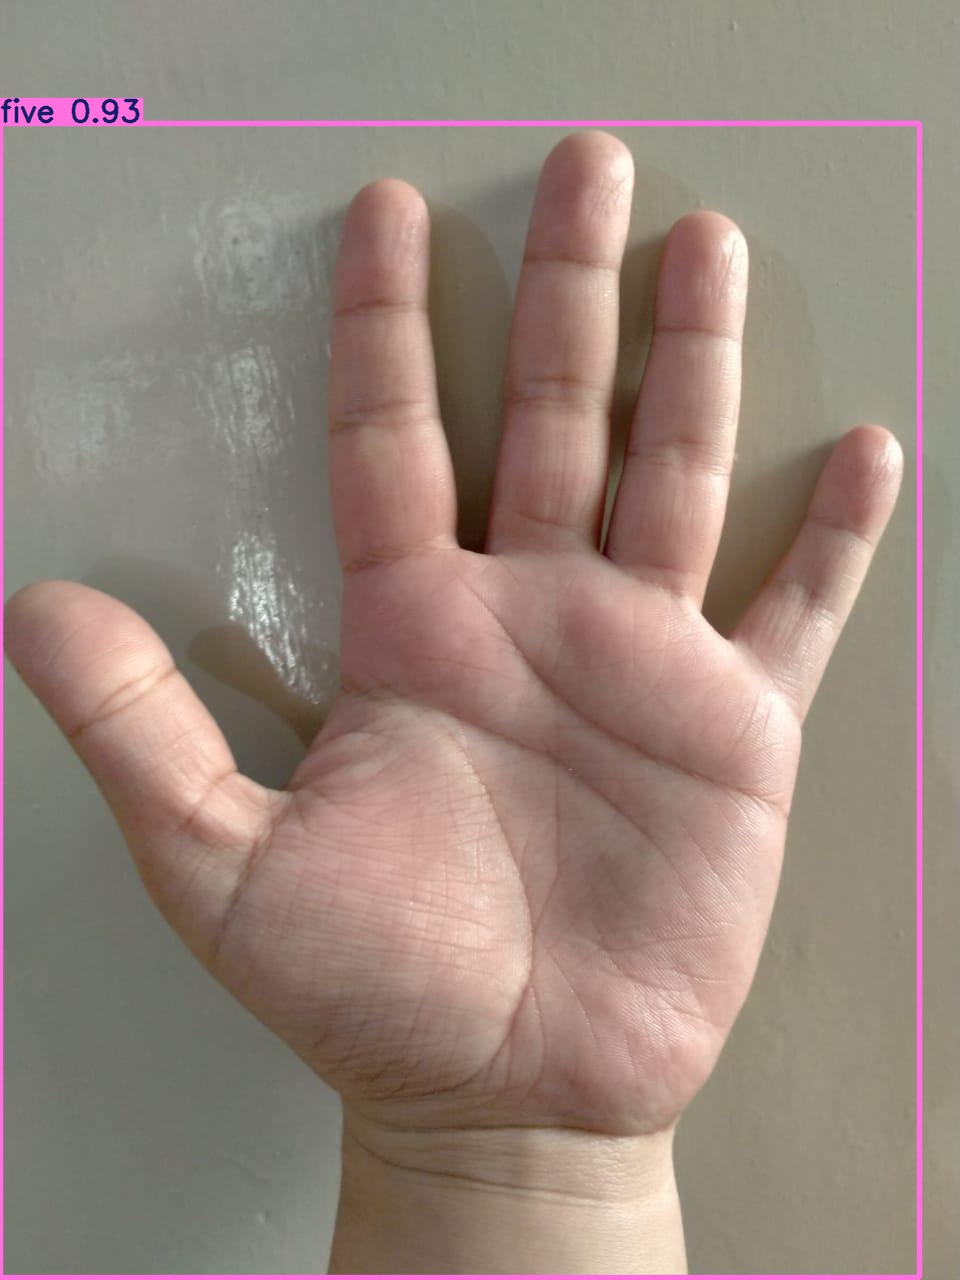

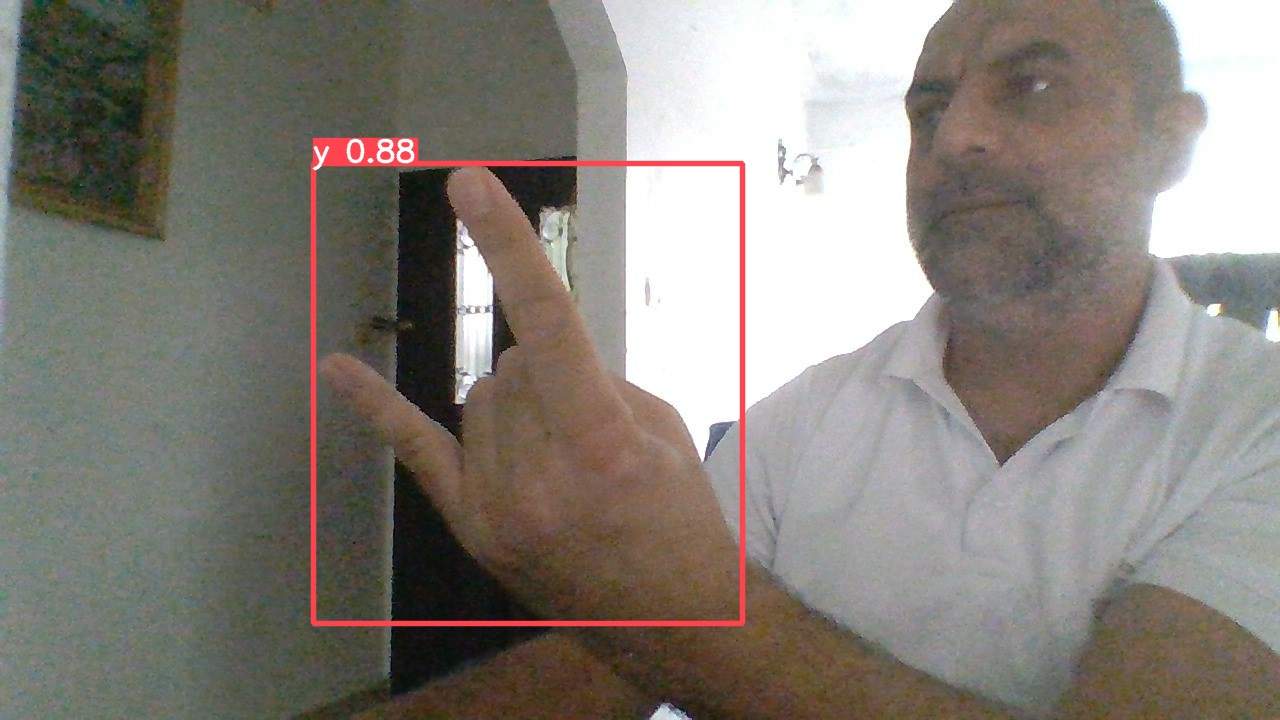

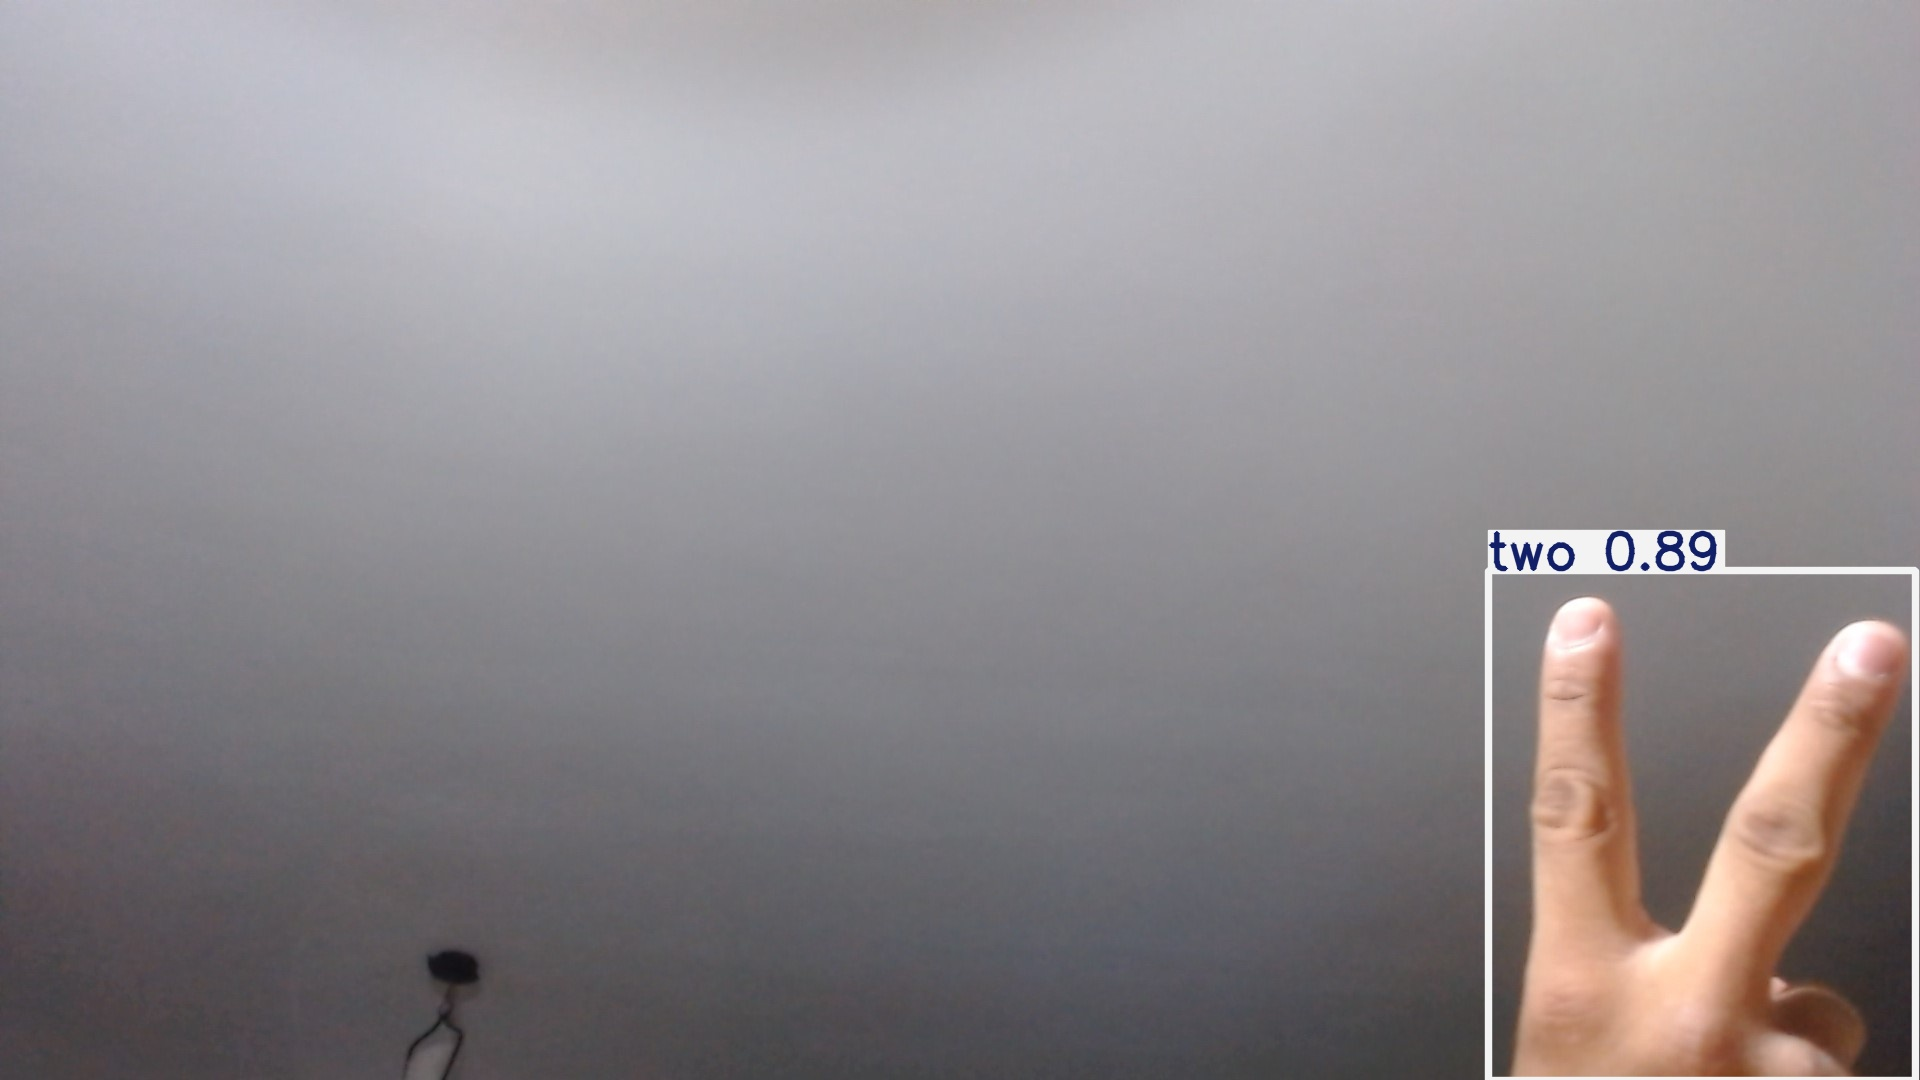

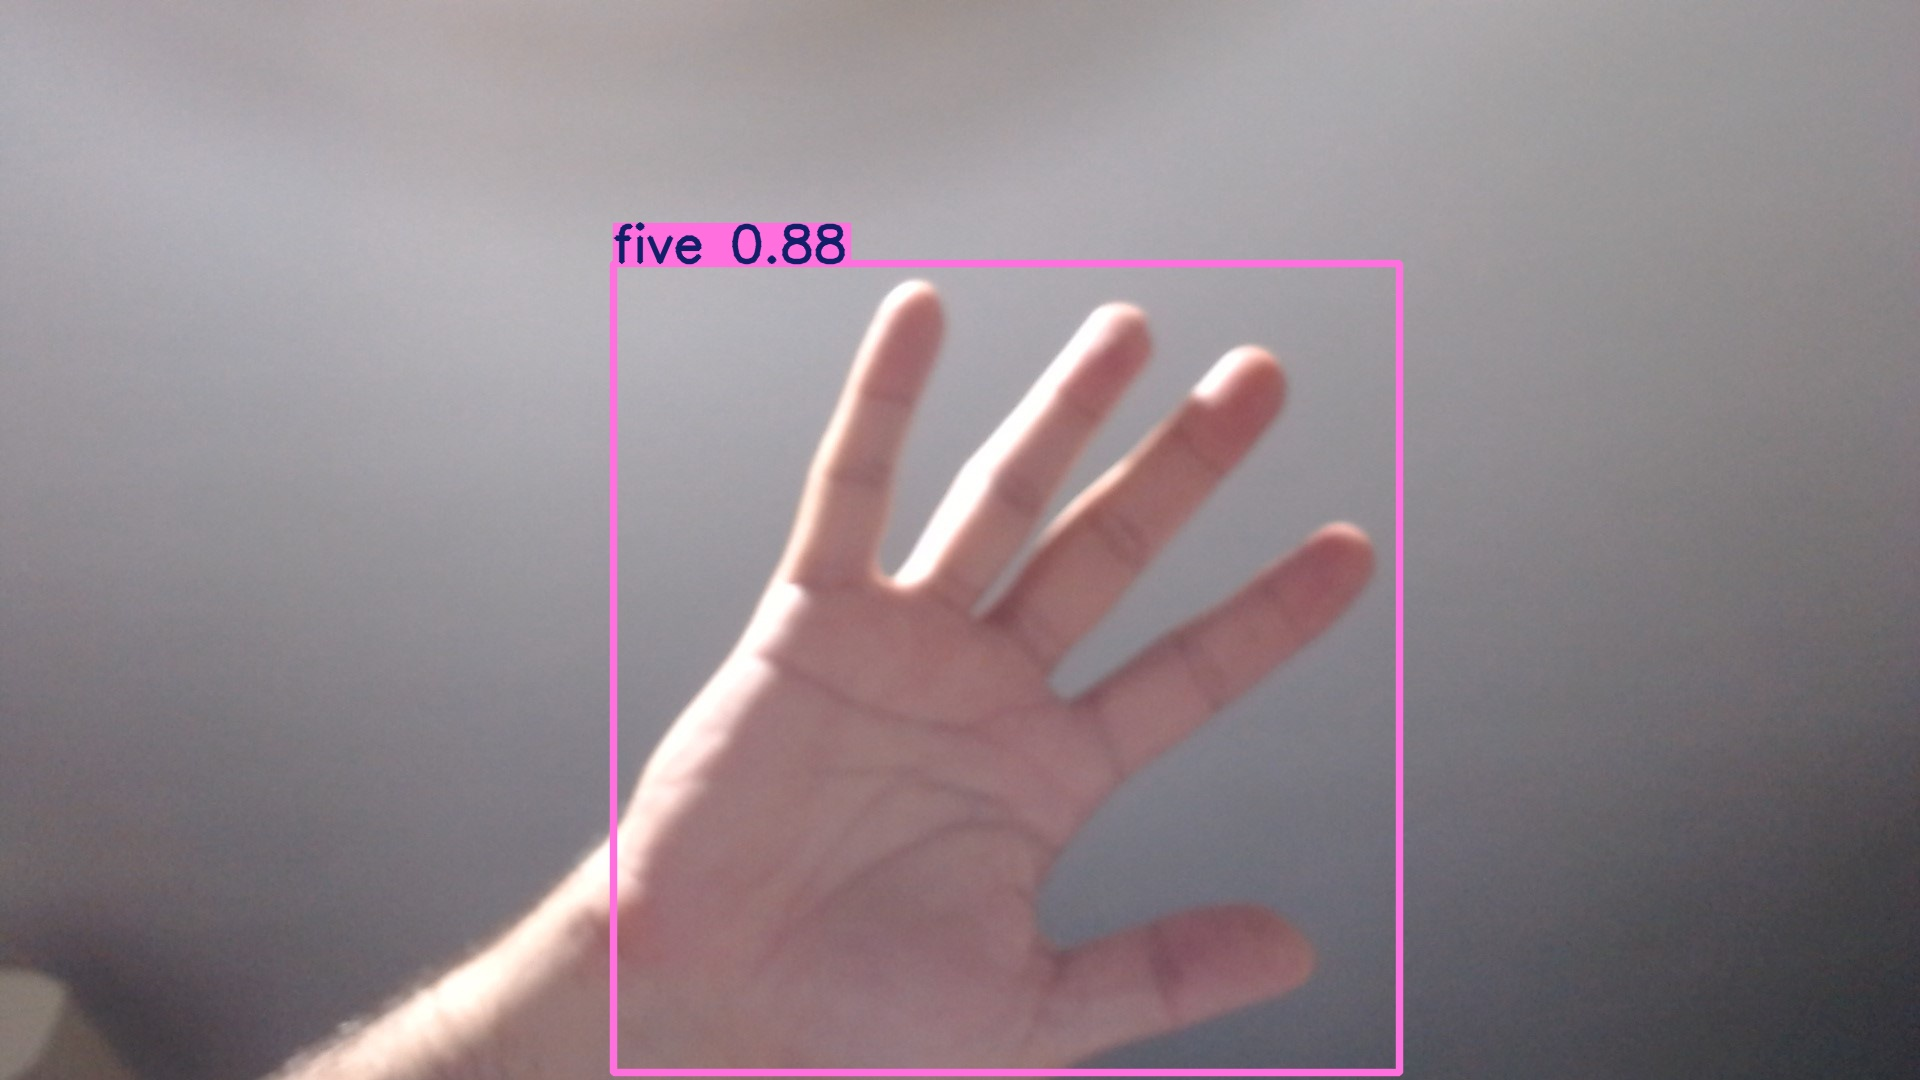

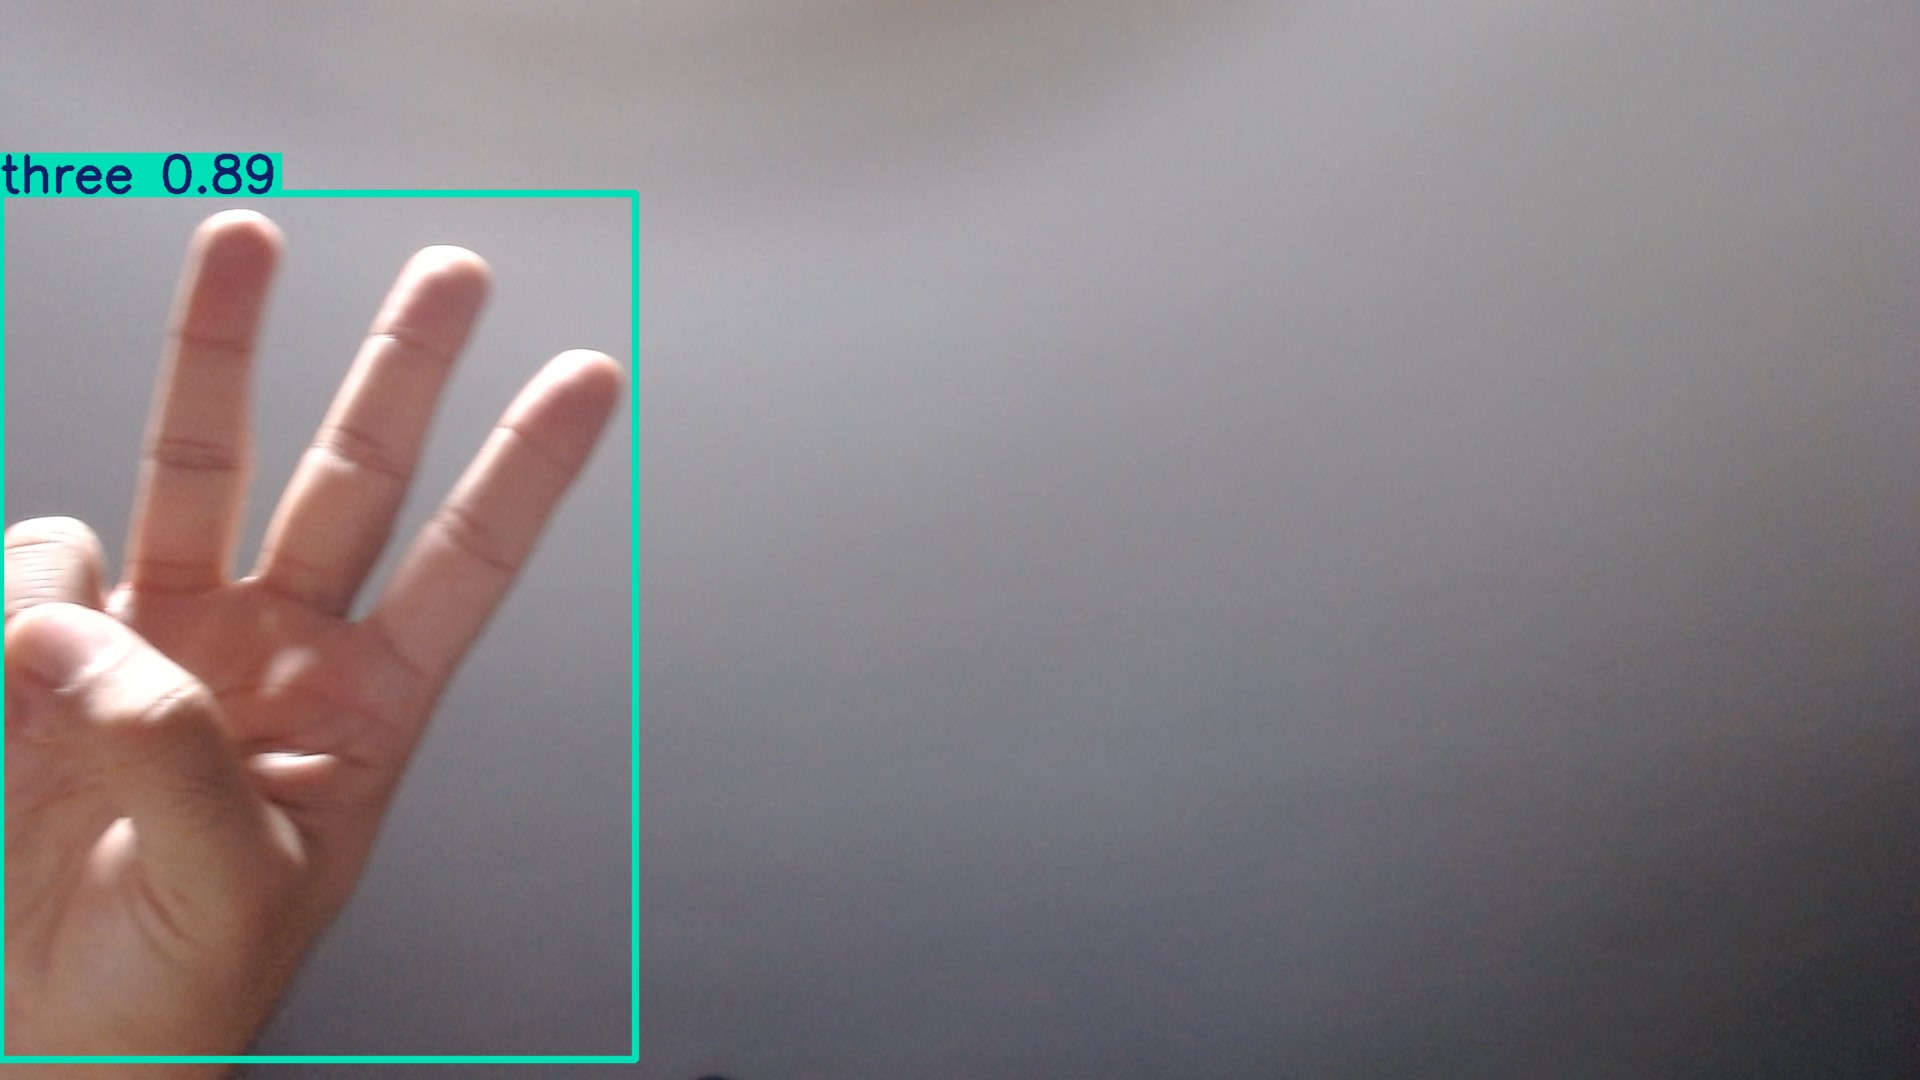

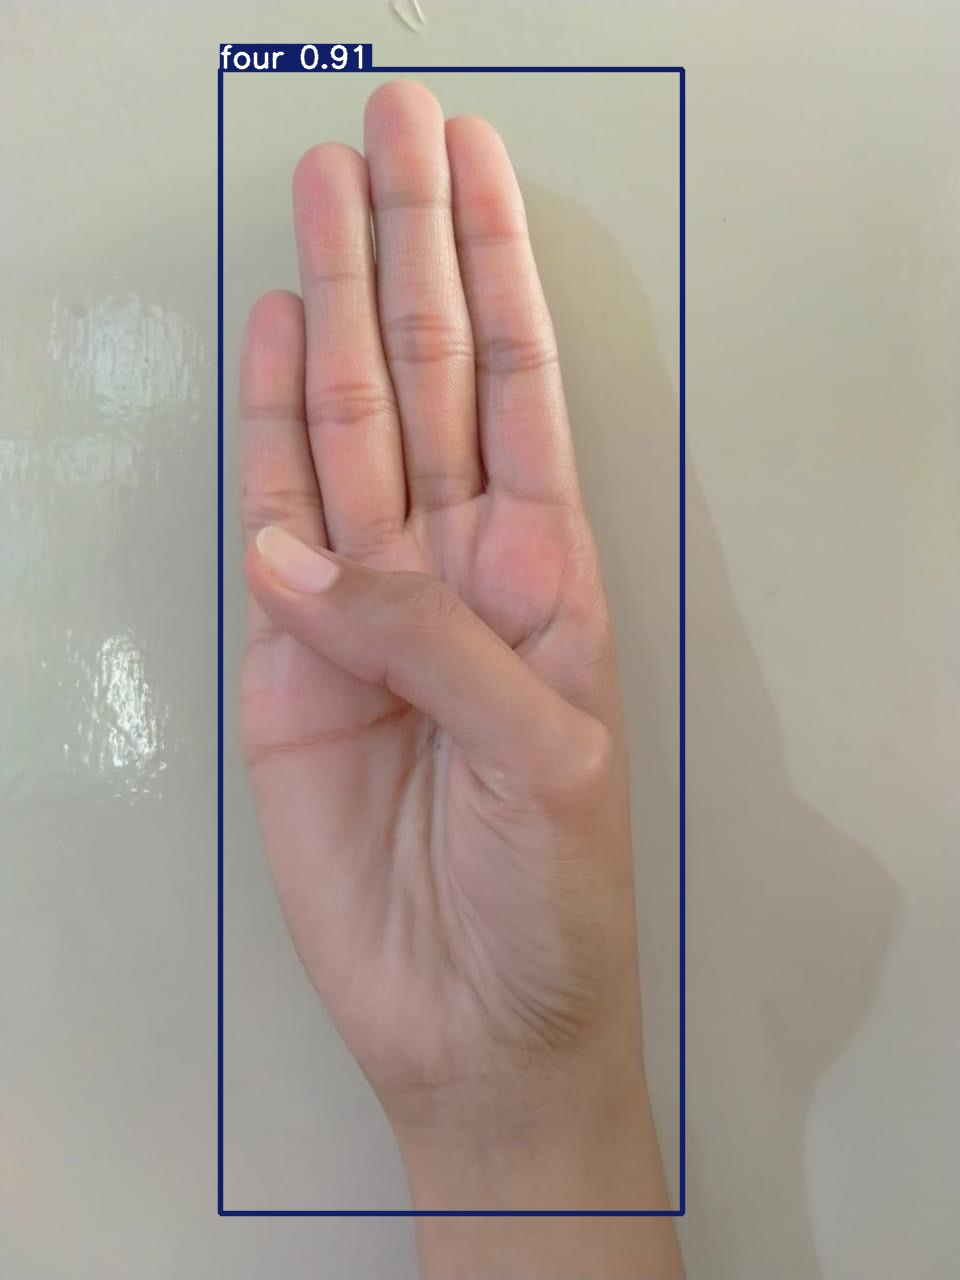

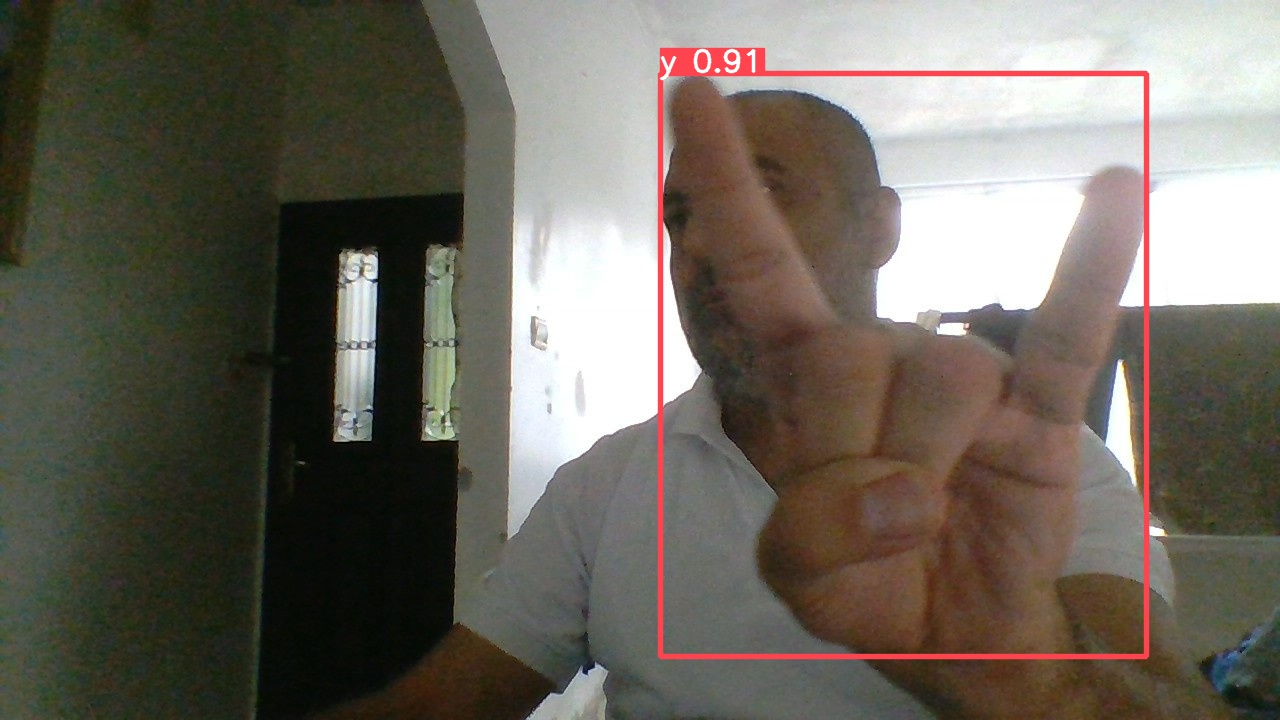

In [ ]:
import glob #uzantsi bu olan ..
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:10]:
  display(Image(filename=image_path, height=400))
  print('\n')

In [ ]:

from ultralytics import YOLO
model = YOLO('/content/runs/detect/train/weights/best.pt')
model.save('/content/drive/MyDrive/best.pt')